<a href="https://colab.research.google.com/github/cjfghk5697/deeplearnig_practice/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>퍼셉트론 정의</h1>
퍼셉트론이란 다수의 신호를 입력으로 받아 하나의 신호로 출력함. 퍼셉트론은 1과 0 두 가지 값만 가질 수 있다.<br>

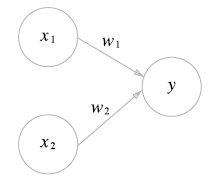<br>
그림1. 입력이 2개인 퍼셉트론<br>
그림1 x1과 x2는 입력 신호, y는 출력 신호, w1과 w2는 가중치를 의미한다. 그림의 원은 노드 혹은 뉴런이라고 부른다.  입력 신호와 가중치가 곱한 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력한다. 그 한계를 임계값이라 하며, 세타 기호로 나타낸다.<br>
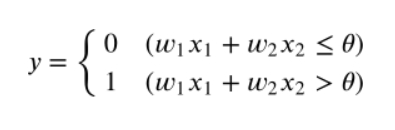 <br>
그림2 퍼셉트론 수식

<hr>
<h1>논리회로(AND, NAND, OR) 구현.</h1>
일단 앞에서 퍼셉트론을 정의했다. 이제는 논리회로 구현을 할 필요가 있다.
간단한 예시로 AND게이트다. (W1,W2,세타)가 (0.5,0.5,0.7) 또는 (1.0,1.0,1.0) 때 모두 AND 게이트의 조건을 만족한다. 매개변수를 이렇게 설정하면 x1과 x2 모두가 1일때 가중 신호의 총합이 주어진 임계값을 웃돌게 된다. 이렇게 NAND와  OR 게이트 조합을 생각하면 된다. <BR>
이제 퍼셉트론을 구현 해볼 것이다. python 3.6이다.

In [4]:
#퍼셉트론 구현

def AND(x1,x2):
  w1,w2,theta=0.5,0.5,0.7
  tmp=x1*w1+x2*w2
  if tmp<=theta:
    return 0
  elif tmp>theta:
    return 1
  
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))



0
0
0
1


실제로 AND 게이트처럼 값이 (1,1)일때만 1을 출력했다.
<hr>
<h1>가중치와 편향 도입</h1>
앞서 구현한 AND 게이트와 다른 방식으로 수정할 것이다. 
<br>

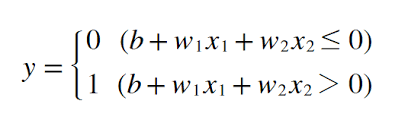
<br>
그림3 퍼셉트론 세타 치환<br>
앞에 그림 2와 달리 세타를 -b로 치환해서 식의 반대로 옮긴다. 그러면 그림 3과 같은 수식이 나온다. 이때 b를 편향(bias)이라한다. 나머지는 똑같다. 이제부터는 위 수식에 편향을 더해 이게 0보다 같거나 낮으면 0, 높으면 1을 출력한다.

In [11]:
import numpy as np
x= np.array([0,1]) #입력
w=np.array([0.5,0.5]) #가중치
b=-0.7 #편향
np.sum(w*x)+b #w*x [0,1] * [0.5,0.5]= [0,0.5] -> np.sum하면 모든 원소의 총합으로 0.5. 그다음 b 편향을 빼면 -0.2로 0보다 작은 값이다. 0의 값을 반환한다.

-0.19999999999999996

In [12]:
def AND(x1,x2):
  x= np.array([x1,x2]) #입력
  w=np.array([0.5,0.5]) #가중치
  b=-0.7 #편향
  tmp=np.sum(w*x)+b 
  if tmp<=0:
    return 0
  else:
    return 1
  
def NAND(x1,x2):
  x= np.array([x1,x2])
  w=np.array([-0.5,-0.5])
  b=0.7
  tmp=np.sum(w*x)+b 
  if tmp<=0:
    return 0
  else:
    return 1
def OR(x1, x2):
  x= np.array([x1,x2])
  w=np.array([0.5,0.5])
  b=-0.2
  tmp=np.sum(w*x)+b 
  if tmp<=0:
    return 0
  else:
    return 1

여기까지 AND 게이트 구현이다. 다시 정리하자면 가중치 (w1,w2)는 중요도를 나타낸다. 편향 b는 얼마나 쉽게 활성화 되느냐를 조정하는 매개변수이다. 어쩔때는 편향도 가중치라고 할 수 있다.
<hr>
<h1>퍼셉트론의 한계</h1>
XOR 게이트는 배타적 논리합이라는 논리 회로이다. 지금까지의 퍼셉트론으로는 XOR 게이트를 구현이 불가능하다. 왜냐하면 지금까지 퍼셉트론 수식은 전부 직선이었다. 만약 비선형 영역(곡선의 영역)으로 나간다면 가능하다. 직선의 영역은 선형 영역이다.

<hr>
<h1>다층 퍼셉트론</h1>
퍼셉트론에 층을 쌓는 것이다. 뭐냐면 AND, NAND, OR 게이트를 조합하는 방법이다.
<br>

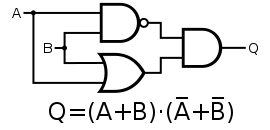
<br>그림 4 XOR 게이트 구현<br>
nand, or 게이트가 합쳐져 있는 것을 확인 할 수 있다. 이를 코드로 구현해보자.

In [13]:
def XOR(x1, x2):
  s1=NAND(x1,x2)
  s2=OR(x1,x2)
  y=AND(s1,s2)
  return y
print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0


XOR를 구현했다. XOR은 다층 구조의 네트워크이다.
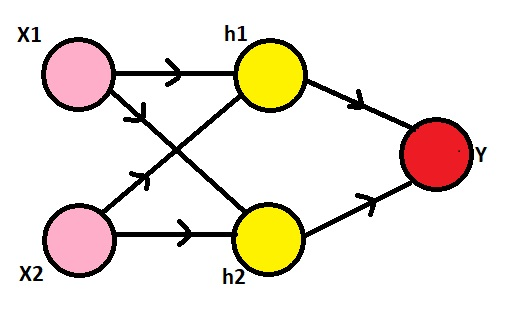
<br> 그림 5 XOR의 퍼셉트론<br>
왼쪽 노드부터 0층, 1층, 2층이라고 부른다. 지금까지 AND, OR는 단층 퍼셉트론이지만 XOR은 다층 퍼셉트론이다.
<BR>
1.0층의 두 뉴런이 입력 신호를 받아 1층의 뉴런으로 신호를 보낸다.
2. 1층의 뉴런이 2층의 뉴런으로 신호를 보내고, 2층의 뉴런은 Y를 출력한다
<BR>
